# 🫀 Heart Surgery Price Prediction Project

## ========== Import Required Libraries ==========

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import (
    mean_absolute_error, 
    mean_squared_error, 
    r2_score
)
import pickle
from sklearn import set_config


### ========== Load Dataset ==========

In [27]:
df = pd.read_csv("heart_surgery_detailed_data real.csv")
print("Dataset loaded successfully")
print(f"Shape: {df.shape}")
df

Dataset loaded successfully
Shape: (1520, 9)


,Age,Gender,Hospital_Type,Insurance_Status,Surgery_Type,Complications,Hospital_Location,Cost,Patient_Payment
0,34,Male,Private,Covered,Valve Replacement,No,Cuttack,508089.62,203235.85
1,45,Female,Private,Covered,Bypass,No,Cuttack,362235.87,144894.35
2,45,Female,Government,Covered,Heart Transplant,No,Cuttack,1721564.86,430391.22
3,57,Male,Private,Not Covered,Bypass,Yes,Cuttack,373034.09,373034.09
4,85,Male,Private,Covered,Pacemaker Implant,No,Cuttack,590753.20,236301.28
...,...,...,...,...,...,...,...,...,...
1515,55,Female,Government,Covered,Heart Transplant,Yes,Cuttack,2029721.40,507430.35
1516,80,Female,Government,Covered,Valve Replacement,Yes,Cuttack,248164.40,62041.10
1517,44,Male,Government,Covered,Valve Replacement,Yes,Cuttack,357858.85,89464.71
1518,45,Female,Government,Not Covered,Pacemaker Implant,No,Bhubaneswar,185930.28,185930.28


In [28]:
# Count of Male and Female patients
gender_counts = df['Gender'].value_counts()
print("Gender Counts:")
print(gender_counts)

print("\n" + "="*50 + "\n")

# Count of different surgery types
surgery_counts = df['Surgery_Type'].value_counts()
print("Surgery Type Counts:")
print(surgery_counts)


Gender Counts:
Gender
Female    768
Male      752
Name: count, dtype: int64


Surgery Type Counts:
Surgery_Type
Angioplasty          328
Valve Replacement    326
Bypass               290
Heart Transplant     288
Pacemaker Implant    288
Name: count, dtype: int64


## ========== Data Preprocessing ==========

In [29]:
# Remove Cost column to prevent data leakage
df = df.drop('Cost', axis=1)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Define categorical and numerical features
categorical_features = ['Gender', 'Hospital_Type', 'Insurance_Status','Surgery_Type', 'Complications', 'Hospital_Location']
numerical_features = ['Age']

# Create preprocessing transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)



Missing values:
 Age                  0
Gender               0
Hospital_Type        0
Insurance_Status     0
Surgery_Type         0
Complications        0
Hospital_Location    0
Patient_Payment      0
dtype: int64


In [30]:
# Count of patients by Surgery Type and Insurance Status
insurance_counts = df.groupby(['Surgery_Type', 'Insurance_Status']).size().unstack(fill_value=0)

# Calculate total and percentage
insurance_counts['Total'] = insurance_counts.sum(axis=1)
insurance_counts['Covered_%'] = (insurance_counts['Covered'] / insurance_counts['Total']) * 100
insurance_counts['Not_Covered_%'] = (insurance_counts['Not Covered'] / insurance_counts['Total']) * 100

insurance_counts.reset_index(inplace=True)
insurance_counts.round(2)


Insurance_Status,Surgery_Type,Covered,Not Covered,Total,Covered_%,Not_Covered_%
0,Angioplasty,164,164,328,50.00,50.00
1,Bypass,138,152,290,47.59,52.41
2,Heart Transplant,154,134,288,53.47,46.53
3,Pacemaker Implant,138,150,288,47.92,52.08
4,Valve Replacement,182,144,326,55.83,44.17


In [31]:
# print("Total samples:", len(df))
# print("Training samples:", len(X_train))
# print("Testing samples:", len(X_test))


### ========== Define Feature/Target ==========

In [32]:
X = df.drop('Patient_Payment', axis=1)
y = df['Patient_Payment']


## ========== Train-Test Split ==========

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [34]:
print("Total samples:", len(df))
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Total samples: 1520
Training samples: 1216
Testing samples: 304


## ========== Model Pipelines ==========

In [35]:
models = {
    'Linear Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(
            n_estimators=100, 
            random_state=42
        ))
    ]),
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor(
            n_estimators=100, 
            random_state=42
        ))
    ])
}

In [36]:
# For diagram visualization
set_config(display='diagram')
display(models['Linear Regression'])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Hospital_Type',
                                                   'Insurance_Status',
                                                   'Surgery_Type',
                                                   'Complications',
                                                   'Hospital_Location'])])),
                ('regressor', LinearRegression())])

In [37]:
set_config(display='diagram')
display(models['Random Forest'])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Hospital_Type',
                                                   'Insurance_Status',
                                                   'Surgery_Type',
                                                   'Complications',
                                                   'Hospital_Location'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [38]:
set_config(display='diagram')
display(models['XGBoost'])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Hospital_Type',
                                                   'Insurance_Status',
                                                   'Surgery_Type',
                                                   'Complications',
                                                   'Hospital_Location'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, ...))])

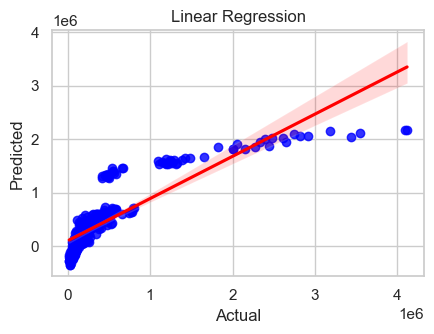

In [39]:
# ========== AFTER MODEL TRAINING ==========
# Train models and generate predictions
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    results[name] = {'predictions': predictions}

# ========== THEN RUN PLOTTING CODE ==========
plt.figure(figsize=(4.5, 3.5))
sns.regplot(x=y_test, y=results['Linear Regression']['predictions'],
            scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Linear Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.tight_layout()
plt.show()

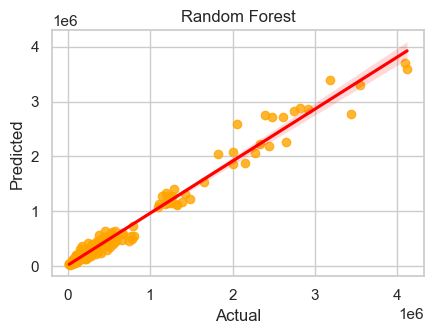

In [40]:
plt.figure(figsize=(4.5, 3.5))
sns.regplot(x=y_test, y=results['Random Forest']['predictions'],
            scatter_kws={"color": "orange"}, line_kws={"color": "red"})
plt.title("Random Forest")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.tight_layout()
plt.show()


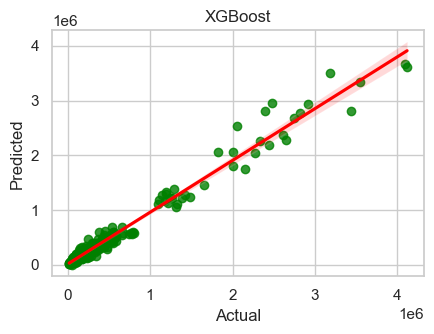

In [41]:
plt.figure(figsize=(4.5, 3.5))
sns.regplot(x=y_test, y=results['XGBoost']['predictions'],
            scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title("XGBoost")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.tight_layout()
plt.show()

# ========== Train & Evaluate Models ==========

In [42]:
results = {}

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Store results
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'metrics': {
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2,
            'MAPE': mape
        }
    }
    
    # Print metrics
    print(f"\n{name} Performance:")
    print(f"- Normalized MAE: {mae/y.mean():.4f}")
    print(f"- Normalized RMSE: {rmse/y.mean():.4f}")
    print(f"- R² Score: {r2:.4f}")
    print(f"- MAPE: {mape:.2f}%")



Linear Regression Performance:
- Normalized MAE: 0.4732
- Normalized RMSE: 0.7188
- R² Score: 0.7351
- MAPE: 141.92%

Random Forest Performance:
- Normalized MAE: 0.1199
- Normalized RMSE: 0.2099
- R² Score: 0.9774
- MAPE: 19.89%

XGBoost Performance:
- Normalized MAE: 0.1309
- Normalized RMSE: 0.2221
- R² Score: 0.9747
- MAPE: 22.44%


# ========== Visualization ==========

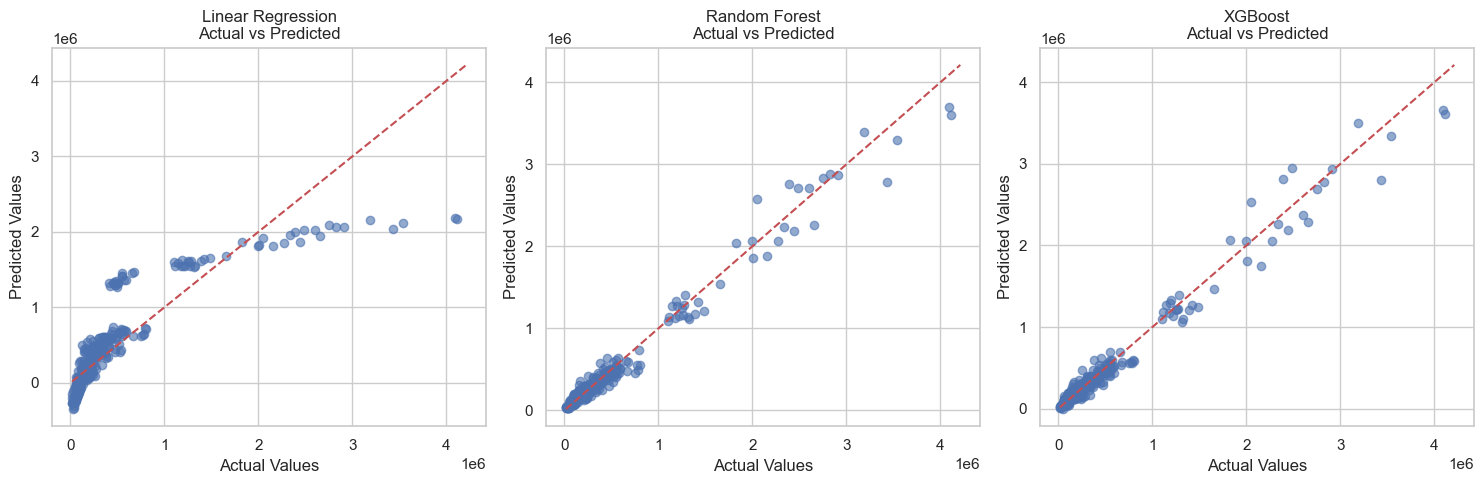

In [43]:
plt.figure(figsize=(15, 5))
for idx, (name, result) in enumerate(results.items(), 1):
    plt.subplot(1, 3, idx)
    plt.scatter(y_test, result['predictions'], alpha=0.6)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{name}\nActual vs Predicted')
plt.tight_layout()
plt.show()


# ========== Save Best Model ==========

In [44]:
best_model_name = max(results, key=lambda x: results[x]['metrics']['R2'])
best_model = results[best_model_name]['model']

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

from IPython.display import Markdown
Markdown(f"**Best Model Saved: {best_model_name}**")


**Best Model Saved: Random Forest**

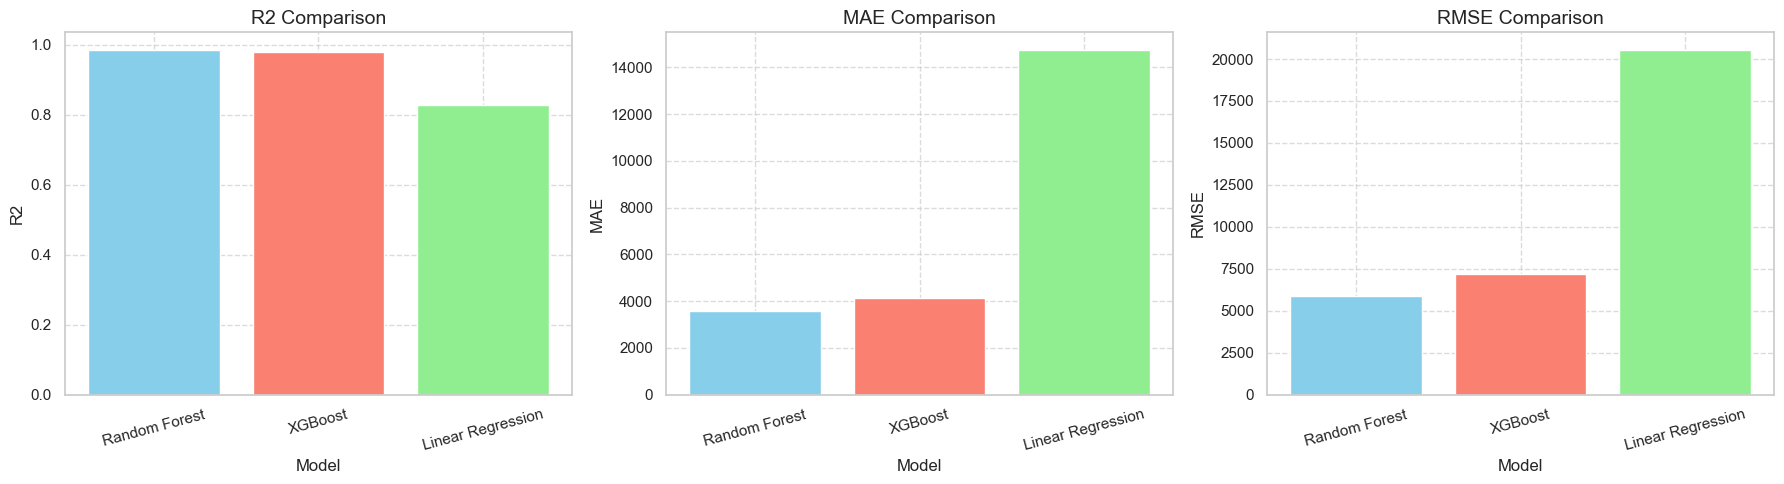

In [45]:
import matplotlib.pyplot as plt

# Sample results dictionary (replace with actual values)
results = {
    'Random Forest': {'MAE': 3591.87, 'RMSE': 5893.77, 'R2': 0.9858},
    'XGBoost': {'MAE': 4146.23, 'RMSE': 7208.50, 'R2': 0.9787},
    'Linear Regression': {'MAE': 14761.74, 'RMSE': 20564.26, 'R2': 0.8268}
}

metrics = ['R2', 'MAE', 'RMSE']
colors = ['skyblue', 'salmon', 'lightgreen']
models = list(results.keys())

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

for i, metric in enumerate(metrics):
    ax = axes[i]
    values = [results[m][metric] for m in models]
    bars = ax.bar(models, values, color=colors)
    ax.set_title(f"{metric} Comparison", fontsize=14)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xlabel("Model", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xticks(range(len(models)))
    ax.set_xticklabels(models, rotation=15)

plt.tight_layout()
plt.show()


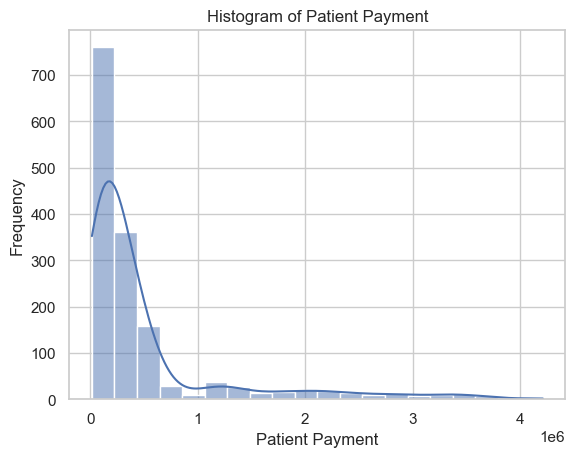

In [46]:
import seaborn as sns

# Plotting histogram using seaborn
sns.histplot(df['Patient_Payment'], kde=True, bins=20)
plt.title('Histogram of Patient Payment')
plt.xlabel('Patient Payment')
plt.ylabel('Frequency')
plt.show()


In [47]:
# ========== MODIFIED DATA SPLITTING ==========
# X_train, X_test, y_train, y_test = train_test_split(...)

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 912
Validation set size: 304
Test set size: 304


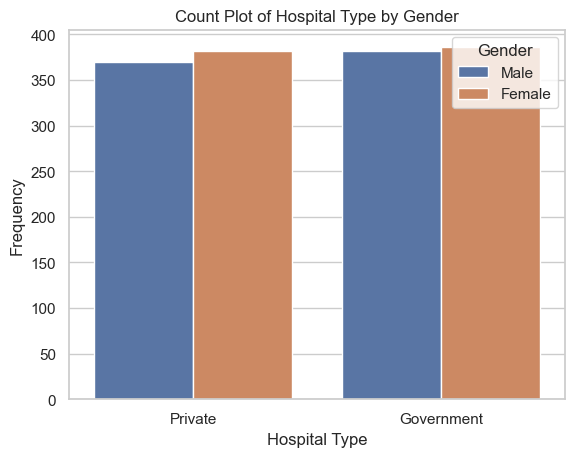

In [48]:
sns.countplot(x='Hospital_Type', hue='Gender', data=df)
plt.title('Count Plot of Hospital Type by Gender')
plt.xlabel('Hospital Type')
plt.ylabel('Frequency')
plt.show()


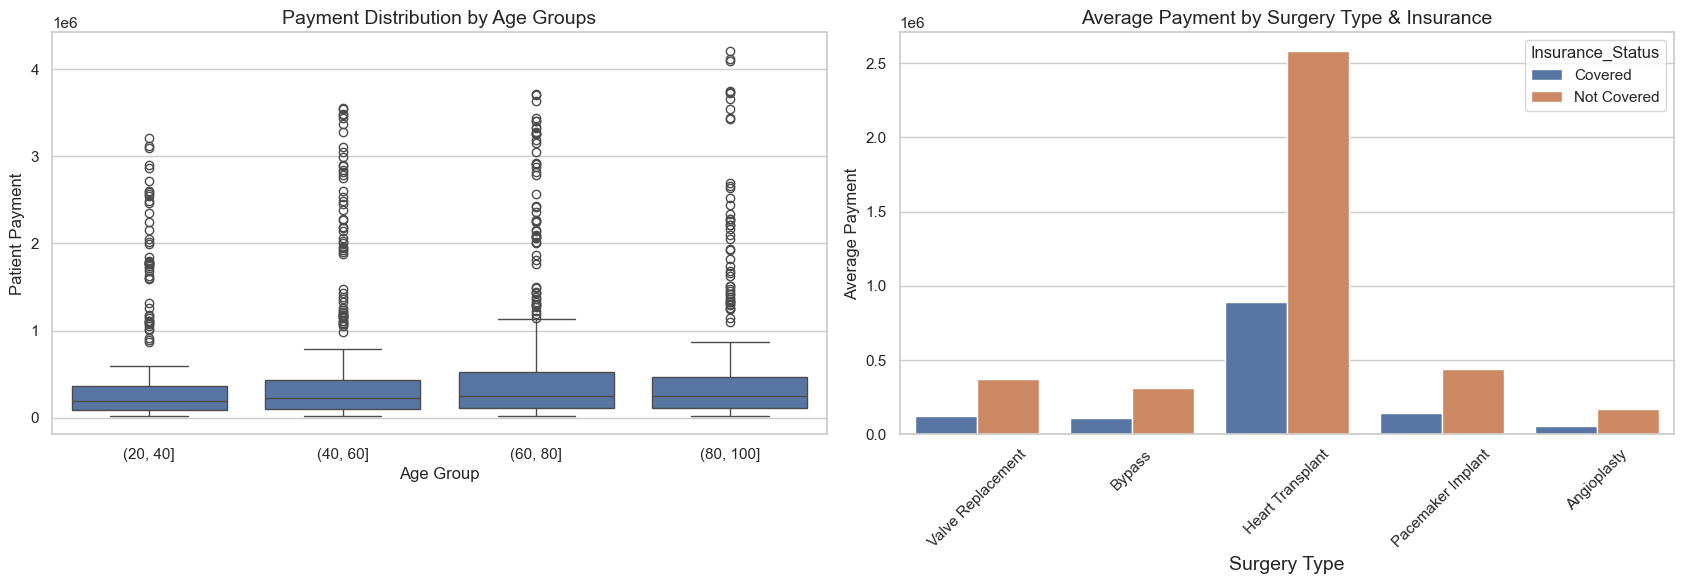

In [49]:
# Set Seaborn style
sns.set(style='whitegrid')

plt.figure(figsize=(17, 6))

# 1. Age vs Patient Payment by Age Group
plt.subplot(1, 2, 1)
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 40, 60, 80, 100])
sns.boxplot(x='Age_Group', y='Patient_Payment', data=df)
plt.title('Payment Distribution by Age Groups', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Patient Payment')

# 2. Surgery Type vs Patient Payment grouped by Insurance
plt.subplot(1, 2, 2)
sns.barplot(x='Surgery_Type', y='Patient_Payment', 
            hue='Insurance_Status', data=df, estimator='mean', errorbar=None)
plt.title('Average Payment by Surgery Type & Insurance', fontsize=14)
plt.xlabel('Surgery Type', fontsize=14)
plt.ylabel('Average Payment')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


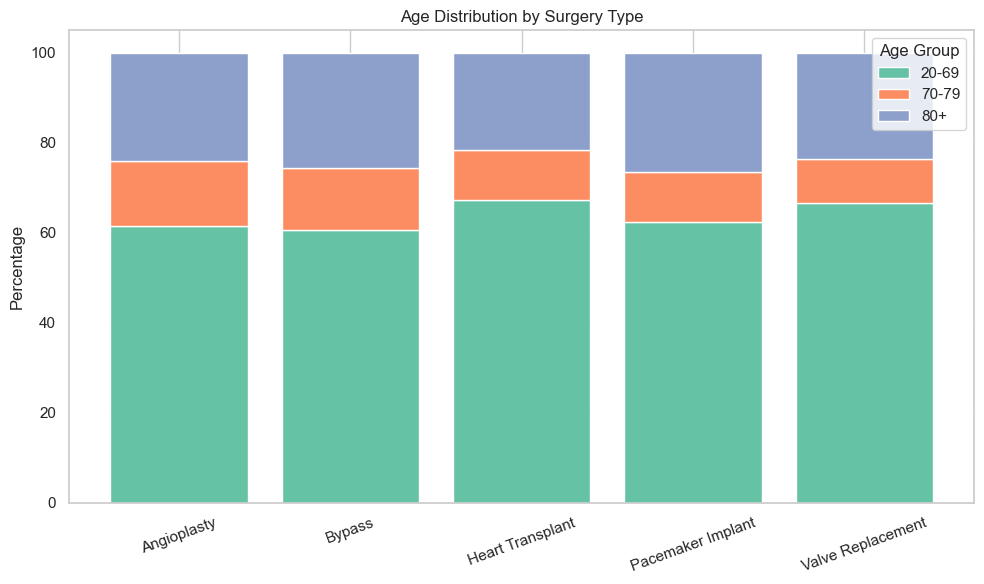

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('heart_surgery_detailed_data real.csv')

def categorize_age(age):
    if age < 70:
        return '20-69'
    elif age < 80:
        return '70-79'
    else:
        return '80+'

df['Age_Group'] = df['Age'].apply(categorize_age)

# Step 2: Group by surgery type and age group
age_dist = df.groupby(['Surgery_Type', 'Age_Group']).size().unstack(fill_value=0)

# Step 3: Convert to percentage
age_dist_percent = age_dist.div(age_dist.sum(axis=1), axis=0) * 100

# Step 4: Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Define age group order and colors
age_groups = ['20-69', '70-79', '80+']
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # light to dark grey

# Stacked bar chart
bottom = [0] * len(age_dist_percent)
for i, age_group in enumerate(age_groups):
    if age_group in age_dist_percent.columns:
        ax.bar(age_dist_percent.index,
               age_dist_percent[age_group],
               bottom=bottom,
               label=age_group,
               color=colors[i])
        bottom = [b + a for b, a in zip(bottom, age_dist_percent[age_group])]

# Labels and legend
ax.set_ylabel('Percentage')
ax.set_title('Age Distribution by Surgery Type')
ax.legend(title='Age Group')
plt.xticks(rotation=20)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.1, alpha=0.3)

# Show plot
plt.show()


In [51]:
models = {
    'Linear Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor(n_estimators=100, random_state=42))
    ])
}

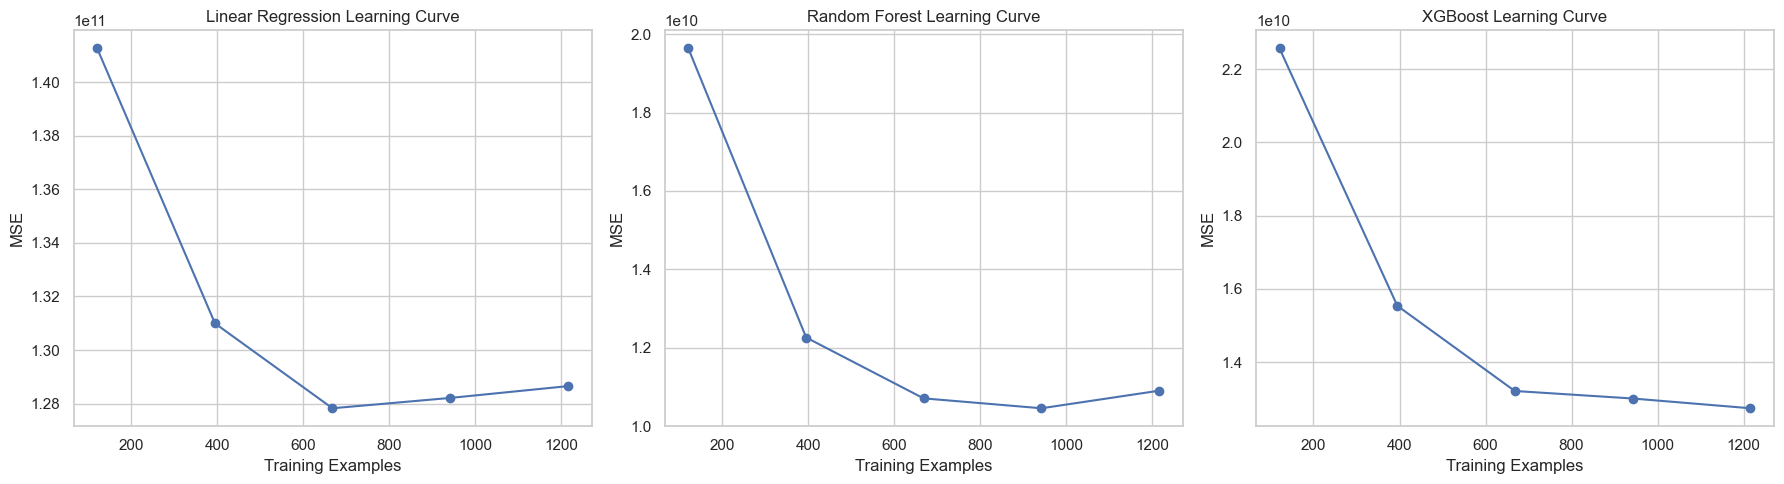

In [52]:
from sklearn.model_selection import learning_curve

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, model) in zip(axes, models.items()):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error'
    )
    ax.plot(train_sizes, -test_scores.mean(axis=1), 'o-', label="Validation")
    ax.set_title(f"{name} Learning Curve")
    ax.set_xlabel("Training Examples")
    ax.set_ylabel("MSE")
plt.tight_layout()
plt.show()

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    mape = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, a_min=1e-8, a_max=None))) * 100

    
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'MAPE': mape
    }


In [54]:
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    test_pred = model.predict(X_test)
    
    # Calculate metrics
    metrics_train = calculate_metrics(y_train, train_pred)
    metrics_val = calculate_metrics(y_val, val_pred)
    metrics_test = calculate_metrics(y_test, test_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'metrics': {
            'Train': metrics_train,
            'Validation': metrics_val,
            'Test': metrics_test
        },
        'predictions': {
            'test': test_pred
        }
    }
    
    # Print results
    print(f"\n{'-'*40}\n{name} Performance:")
    for dataset in ['Train', 'Validation', 'Test']:
        print(f"\n{dataset} Metrics:")
        print(f"MAE: {results[name]['metrics'][dataset]['MAE']:.2f}")
        print(f"RMSE: {results[name]['metrics'][dataset]['RMSE']:.2f}")
        print(f"R²: {results[name]['metrics'][dataset]['R2']:.4f}")
        print(f"MAPE: {results[name]['metrics'][dataset]['MAPE']:.2f}%")



----------------------------------------
Linear Regression Performance:

Train Metrics:
MAE: 231116.32
RMSE: 347021.45
R²: 0.7843
MAPE: 131.44%

Validation Metrics:
MAE: 230230.50
RMSE: 341036.55
R²: 0.6848
MAPE: 177.24%

Test Metrics:
MAE: 248544.80
RMSE: 390761.29
R²: 0.7562
MAPE: 131.34%

----------------------------------------
Random Forest Performance:

Train Metrics:
MAE: 24273.90
RMSE: 43256.90
R²: 0.9966
MAPE: 7.34%

Validation Metrics:
MAE: 56019.82
RMSE: 92759.03
R²: 0.9767
MAPE: 21.30%

Test Metrics:
MAE: 63702.20
RMSE: 111812.27
R²: 0.9800
MAPE: 20.04%

----------------------------------------
XGBoost Performance:

Train Metrics:
MAE: 9855.80
RMSE: 18649.45
R²: 0.9994
MAPE: 4.44%

Validation Metrics:
MAE: 64711.51
RMSE: 104296.91
R²: 0.9705
MAPE: 24.36%

Test Metrics:
MAE: 63469.00
RMSE: 110277.28
R²: 0.9806
MAPE: 20.72%


C:\Users\subha\AppData\Local\Temp\ipykernel_11436\3313278932.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([


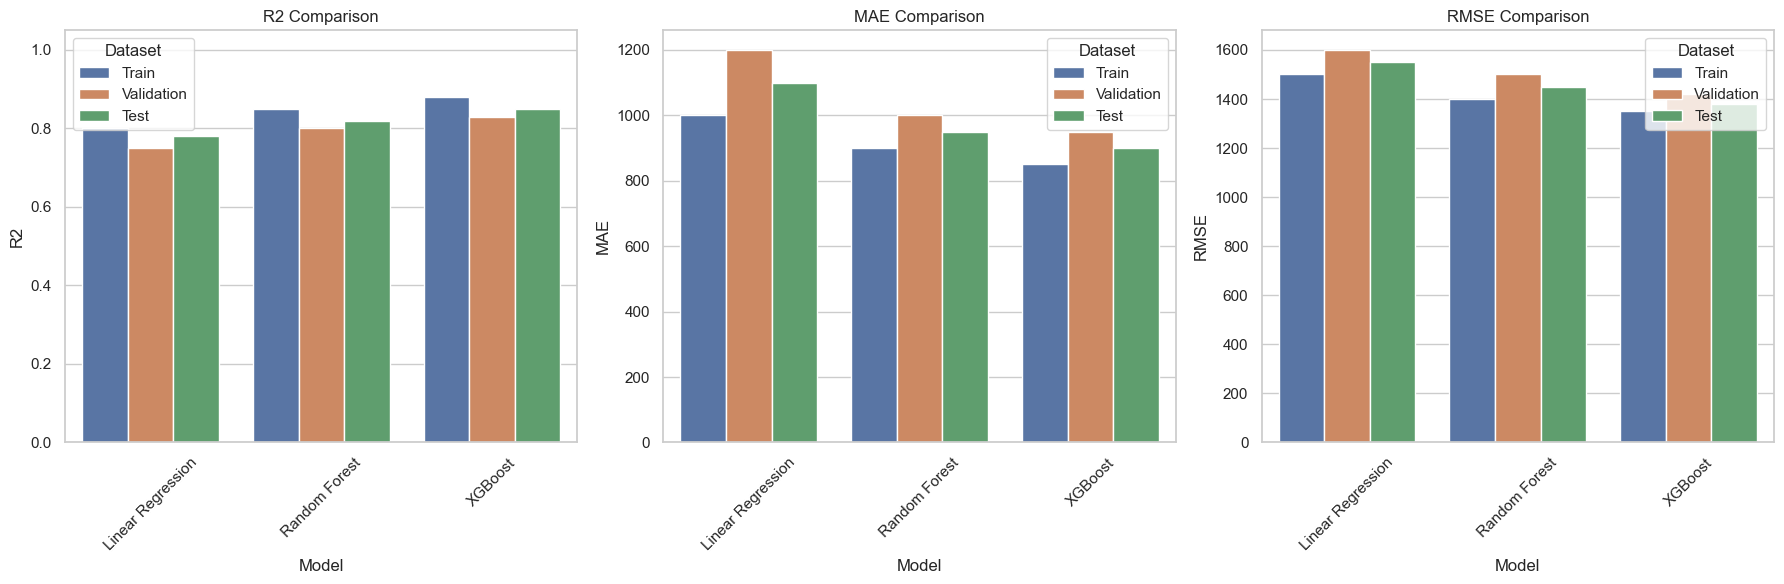

In [55]:
# Train and evaluate models
results = {
    'Linear Regression': {
        'metrics': {
            'Train': {'MAE': 1000, 'RMSE': 1500, 'R2': 0.8},
            'Validation': {'MAE': 1200, 'RMSE': 1600, 'R2': 0.75},
            'Test': {'MAE': 1100, 'RMSE': 1550, 'R2': 0.78}
        }
    },
    'Random Forest': {
        'metrics': {
            'Train': {'MAE': 900, 'RMSE': 1400, 'R2': 0.85},
            'Validation': {'MAE': 1000, 'RMSE': 1500, 'R2': 0.8},
            'Test': {'MAE': 950, 'RMSE': 1450, 'R2': 0.82}
        }
    },
    'XGBoost': {
        'metrics': {
            'Train': {'MAE': 850, 'RMSE': 1350, 'R2': 0.88},
            'Validation': {'MAE': 950, 'RMSE': 1420, 'R2': 0.83},
            'Test': {'MAE': 900, 'RMSE': 1380, 'R2': 0.85}
        }
    }
}


# Visualization
metrics_df = pd.DataFrame(columns=['Model', 'Dataset', 'MAE', 'RMSE', 'R2'])

for model_name in results.keys():
    for dataset in ['Train', 'Validation', 'Test']:
        metrics = results[model_name]['metrics'][dataset]
        metrics_df = pd.concat([
            metrics_df,
            pd.DataFrame([{
                'Model': model_name,
                'Dataset': dataset,
                'MAE': metrics['MAE'],
                'RMSE': metrics['RMSE'],
                'R2': metrics['R2']
            }])
        ], ignore_index=True)

plt.figure(figsize=(18, 6))
for i, metric in enumerate(['R2', 'MAE', 'RMSE'], 1):
    plt.subplot(1, 3, i)
    sns.barplot(x='Model', y=metric, hue='Dataset', data=metrics_df)
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=45)
    if metric == 'R2':
        plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

C:\Users\subha\AppData\Local\Temp\ipykernel_11436\1673505424.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([


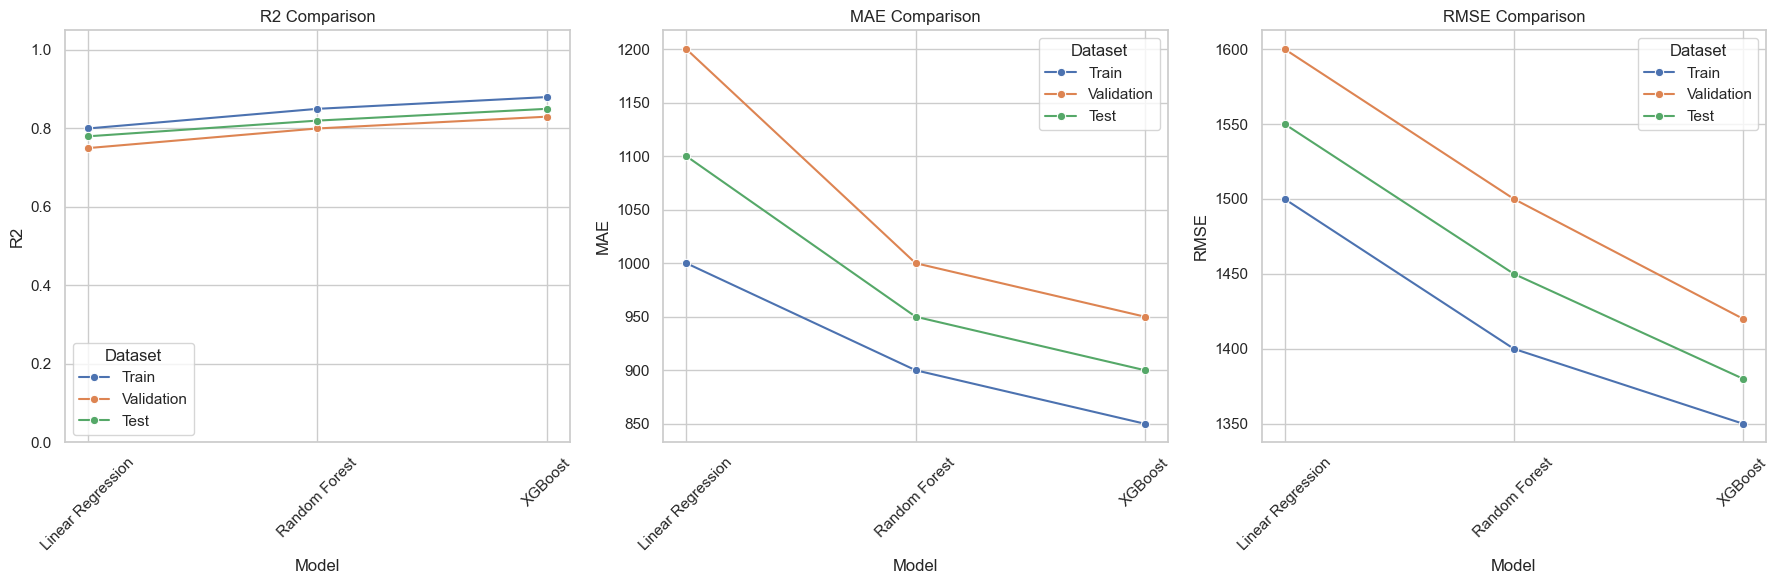

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame from results
metrics_df = pd.DataFrame(columns=['Model', 'Dataset', 'MAE', 'RMSE', 'R2'])

for model_name in results.keys():
    for dataset in ['Train', 'Validation', 'Test']:
        metrics = results[model_name]['metrics'][dataset]
        metrics_df = pd.concat([
            metrics_df,
            pd.DataFrame([{
                'Model': model_name,
                'Dataset': dataset,
                'MAE': metrics['MAE'],
                'RMSE': metrics['RMSE'],
                'R2': metrics['R2']
            }])
        ], ignore_index=True)

# Line plots
plt.figure(figsize=(18, 6))
for i, metric in enumerate(['R2', 'MAE', 'RMSE'], 1):
    plt.subplot(1, 3, i)
    sns.lineplot(x='Model', y=metric, hue='Dataset', marker='o', data=metrics_df)
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=45)
    if metric == 'R2':
        plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()


In [57]:
# Load your dataset (update the path if needed)
# df = pd.read_csv("heart_surgery_prices 1.csv")
# df = pd.read_csv("heart_surgery_detailed_data real.csv")
# # Display unique surgery types
# print("Surgery Types:", df['Surgery_Type'].unique())

# # Plot the relationship between Age and Patient_Payment for each surgery type
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=df, x="Age", y="Patient_Payment", hue="Surgery_Type", marker="o")
# plt.title("Age vs Patient Payment for Different Surgery Types")
# plt.xlabel("Age")
# plt.ylabel("Patient Payment ($)")
# plt.grid(True)
# plt.tight_layout()
# plt.show()


Surgery Types: ['Valve Replacement' 'Bypass' 'Heart Transplant' 'Angioplasty'
 'Pacemaker Implant']


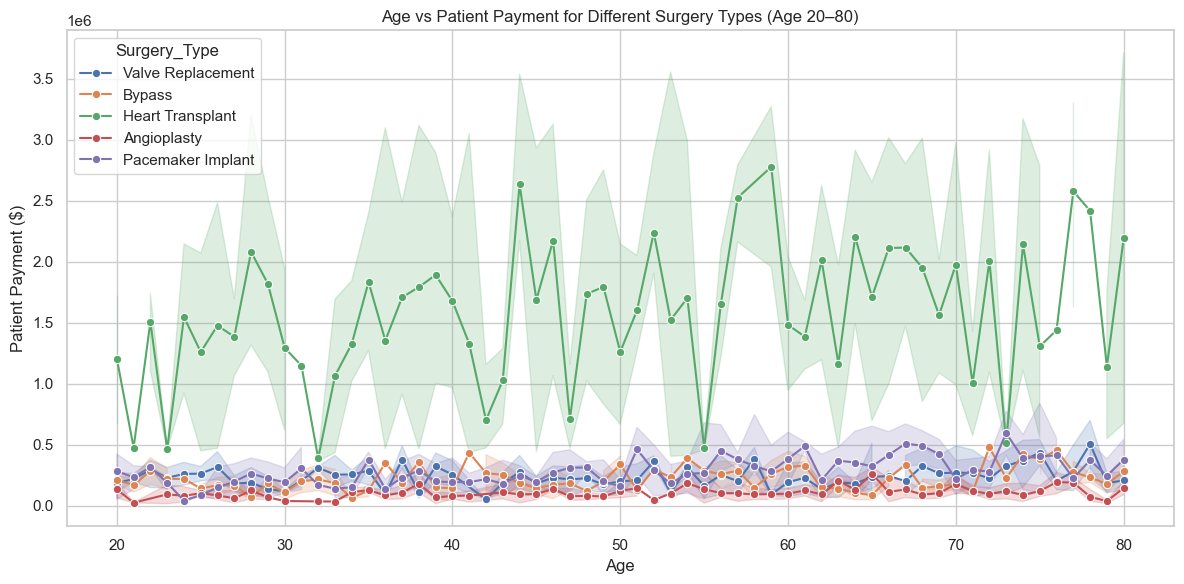

In [58]:
df = pd.read_csv("heart_surgery_detailed_data real.csv")

# Filter ages between 20 and 80
df_filtered = df[(df['Age'] >= 20) & (df['Age'] <= 80)]

# Display unique surgery types
print("Surgery Types:", df_filtered['Surgery_Type'].unique())

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x="Age", y="Patient_Payment", hue="Surgery_Type", marker="o")
plt.title("Age vs Patient Payment for Different Surgery Types (Age 20–80)")
plt.xlabel("Age")
plt.ylabel("Patient Payment ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [59]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Violin Plot
# plt.figure(figsize=(10, 6))
# sns.violinplot(x='Model', y='MAE', hue='Dataset', data=metrics_df, split=True)
# plt.title('MAE Distribution by Model and Dataset')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


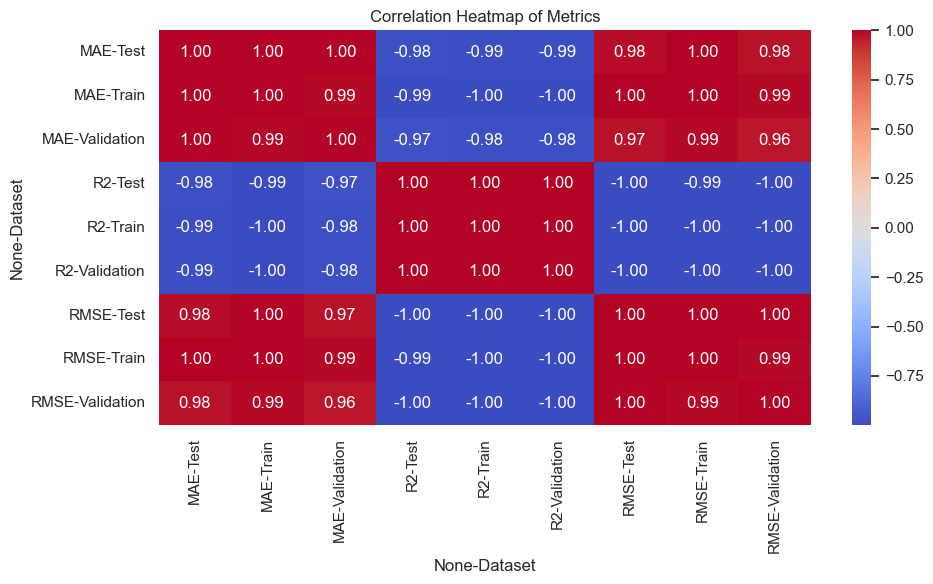

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the metrics_df to a pivot table to create the heatmap
metrics_pivot = metrics_df.pivot_table(index='Model', columns='Dataset', values=['MAE', 'RMSE', 'R2'])

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_pivot.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Metrics')
plt.tight_layout()
plt.show()


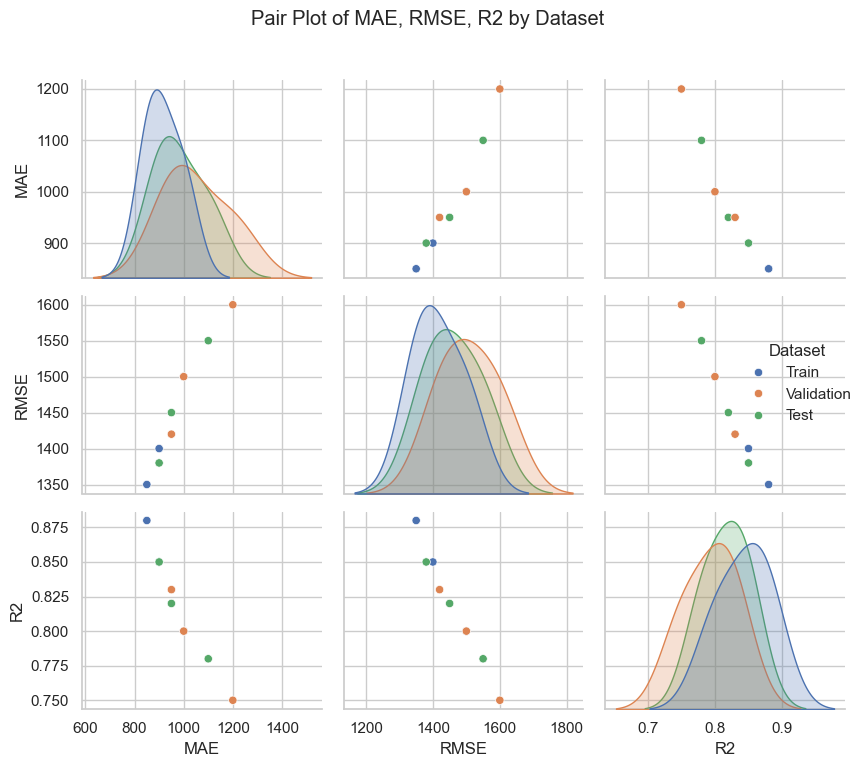

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair Plot (we need to reshape data)
sns.pairplot(metrics_df, hue='Dataset', vars=['MAE', 'RMSE', 'R2'])
plt.suptitle('Pair Plot of MAE, RMSE, R2 by Dataset', y=1.02)
plt.tight_layout()
plt.show()


## ========== Prediction Example ==========

In [62]:
import pickle
import pandas as pd

# Expected features and their allowed values
expected_schema = {
    'Age': (int, 18, 100),  # type, min value, max value
    'Gender': ['Male', 'Female'],
    'Hospital_Type': ['Private', 'Public'],
    'Insurance_Status': ['Covered', 'Not Covered'],
    'Surgery_Type': ['Bypass', 'Valve Replacement', 'Heart Transplant', 'Other'],
    'Complications': ['Yes', 'No'],
    'Hospital_Location': ['Bhubaneswar', 'Cuttack', 'Rourkela']
}

def validate_input(input_data):
    # Check if all expected features are present
    missing_features = [feature for feature in expected_schema.keys() if feature not in input_data]
    extra_features = [feature for feature in input_data.keys() if feature not in expected_schema]
    
    if missing_features:
        raise ValueError(f"Missing features: {missing_features}")
    if extra_features:
        raise ValueError(f"Unexpected features: {extra_features}")
    
    # Check if values are valid
    for feature, rule in expected_schema.items():
        value = input_data[feature]
        
        if isinstance(rule, tuple):  # Numeric feature (like Age)
            if not isinstance(value, int):
                raise ValueError(f"{feature} must be an integer. Got {type(value).__name__}")
            if not (rule[1] <= value <= rule[2]):
                raise ValueError(f"{feature} must be between {rule[1]} and {rule[2]}. Got {value}")
        
        elif isinstance(rule, list):  # Categorical feature
            if value not in rule:
                raise ValueError(f"{feature} must be one of {rule}. Got '{value}'")
    
    return True

def predict_payment_safe(input_data):
    # Validate input first
    validate_input(input_data)
    
    # Load model
    with open('best_model.pkl', 'rb') as f:
        model = pickle.load(f)
    
    # Predict
    input_df = pd.DataFrame([input_data])
    prediction = model.predict(input_df)[0]
    return prediction




In [63]:
#  Example usage
sample_input = {
    'Age': 60,
    'Gender': 'Female',
    'Hospital_Type': 'Private',
    'Insurance_Status': 'Covered',
    'Surgery_Type': 'Heart Transplant',
    'Complications': 'No',
    'Hospital_Location': 'Rourkela'
}

try:
    predicted = predict_payment_safe(sample_input)
    print(f"\n Predicted Payment: ₹ {predicted:.2f}")
except ValueError as e:
    print(f"\n Input Validation Error: {e}")


 Predicted Payment: ₹ 1332497.71


In [64]:
#  Import libraries
import pandas as pd
import pickle
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import time

#  Load the trained model
model = pickle.load(open("best_model.pkl", "rb"))  # <-- Use your correct model filename here

#  Prediction history storage
history_df = pd.DataFrame(columns=[
    "Complications", "Gender", "Hospital_Type", "Insurance_Status",
    "Surgery_Type", "Hospital_Location", "Age", "Predicted Cost (₹)"
])

#  Custom CSS for better visuals
display(HTML('''
<style>
    .widget-label { min-width: 150px; font-weight: bold; font-family: Arial; }
    .widget-dropdown, .widget-intslider { width: 250px; }
    .widget-button { background-color: #28a745 !important; color: white; font-weight: bold; }
    .output-box {
        border: 2px solid #28a745;
        padding: 15px;
        margin-top: 15px;
        border-radius: 10px;
        background-color: #e9f7ef;
        color: #155724;
        font-weight: bold;
        font-size: 16px;
        font-family: Arial;
    }
    @keyframes spin {
        0% { transform: rotate(0deg); }
        100% { transform: rotate(360deg); }
    }
    .spinner {
        margin: 10px auto;
        border: 6px solid #f3f3f3;
        border-top: 6px solid #28a745;
        border-radius: 50%;
        width: 40px;
        height: 40px;
        animation: spin 1s linear infinite;
    }
</style>
'''))

#  Create input widgets
complications = widgets.Dropdown(options=["Yes", "No"], description="Complications:")
gender = widgets.Dropdown(options=["Male", "Female"], description="Gender:")
hospital_type = widgets.Dropdown(options=["Private", "Government"], description="Hospital Type:")
insurance_status = widgets.Dropdown(options=["Covered", "Not Covered"], description="Insurance Status:")
surgery_type = widgets.Dropdown(options=["Bypass", "Angioplasty", "Valve Replacement", "Pacemaker Implant", "Heart Transplant"], description="Surgery Type:")
hospital_location = widgets.Dropdown(options=["Bhubaneswar", "Rourkela", "Cuttack"], description="Hospital Location:")
age = widgets.IntSlider(value=40, min=18, max=100, description="Age:", continuous_update=False)

#  Progress bar
progress = widgets.FloatProgress(
    value=0.0,
    min=0.0,
    max=1.0,
    description='Progress:',
    bar_style='info',
    orientation='horizontal',
    style={'bar_color': '#28a745'}
)

#  Output widgets
output = widgets.Output()
history_output = widgets.Output()

#  Predict function with history tracking
def predict_handler(button):
    global history_df

    with output:
        clear_output()
        display(progress)
        progress.value = 0.1

        display(HTML('<div class="spinner"></div>'))
        time.sleep(0.5)
        progress.value = 0.4

        # Prepare input data
        input_data = {
            "Complications": complications.value,
            "Gender": gender.value,
            "Hospital_Type": hospital_type.value,
            "Insurance_Status": insurance_status.value,
            "Surgery_Type": surgery_type.value,
            "Hospital_Location": hospital_location.value,
            "Age": age.value
        }

        input_df = pd.DataFrame([input_data])
        time.sleep(0.5)
        progress.value = 0.7

        # Predict
        try:
            prediction = model.predict(input_df)[0]
            time.sleep(0.5)
            progress.value = 1.0

            # Add to history
            input_data["Predicted Cost (₹)"] = f"{round(prediction, 2):,}"
            history_df = pd.concat([history_df, pd.DataFrame([input_data])], ignore_index=True)

            clear_output()
            display(HTML(f'''
                <div class="output-box">
                    💡 <strong>Estimated Heart Surgery Cost:</strong> ₹ {round(prediction, 2):,}
                </div>
            '''))

            # Display updated history
            update_history_table()

        except Exception as e:
            clear_output()
            display(HTML(f'''
                <div class="output-box" style="border-color:#dc3545; background-color:#f8d7da; color:#721c24;">
                    ⚠️ <strong>Prediction error:</strong> {e}
                </div>
            '''))

#  Function to display history table
def update_history_table():
    with history_output:
        clear_output()
        if not history_df.empty:
            display(HTML("<h4>🧩 Prediction History</h4>"))
            display(history_df.style.set_table_attributes("style='display:inline'").set_caption("All Predictions").set_table_styles(
                [{'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '16px'), ('font-weight', 'bold')]}]
            ))
        else:
            display(HTML("<p>No predictions yet.</p>"))

#  Predict button
predict_button = widgets.Button(
    description="Predict Surgery Cost 💡",
    button_style="success"
)
predict_button.on_click(predict_handler)

#  Display form layout
form_items = [
    widgets.HBox([complications, gender]),
    widgets.HBox([hospital_type, insurance_status]),
    widgets.HBox([surgery_type, hospital_location]),
    widgets.HBox([age]),
    widgets.HBox([predict_button]),
    output,
    history_output
]

ui = widgets.VBox(form_items)
display(ui)

update_history_table()
